In [13]:
# Import libraries that we'll need...
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample
from matplotlib import pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

In [14]:
# Import data
student_grades = pd.read_csv('student_score.txt', sep=' ')
student_grades

,mech,vecs,alg,analy,stat
0,7,51,43,17,22
1,44,69,53,53,53
2,49,41,61,49,64
3,59,70,68,62,56
4,34,42,50,47,29
5,46,40,47,29,17
6,0,40,21,9,14
7,32,45,49,57,64
8,49,57,47,39,26
9,52,64,60,63,54


In [16]:
corr_mat = np.corrcoef(student_grades.T)
corr_mat.round(2)

array([[1.  , 0.5 , 0.76, 0.65, 0.54],
       [0.5 , 1.  , 0.59, 0.51, 0.38],
       [0.76, 0.59, 1.  , 0.76, 0.67],
       [0.65, 0.51, 0.76, 1.  , 0.74],
       [0.54, 0.38, 0.67, 0.74, 1.  ]])

In [17]:
eigenvalues = np.linalg.eig(corr_mat)[0]
eigenvalues

array([3.46267658, 0.6599222 , 0.44717458, 0.19665198, 0.23357465])

In [18]:
eigratio = eigenvalues.max() / eigenvalues.sum()
eigratio 

0.6925353153076884

In [19]:
# Perform jacknife resampling and collect results.
student_grades['ind'] = student_grades.index
eigval_ratios=list()
for jackknife_it in range(student_grades.shape[0]):
    resampled_df = student_grades.loc[student_grades['ind'] != jackknife_it]
    corr_mat_J = np.corrcoef(resampled_df.T)
    eigenvalues_J = np.linalg.eig(corr_mat_J)[0]
    eigratio_J = eigenvalues_J.max() / eigenvalues_J.sum()
    eigval_ratios.append(eigratio_J)

In [20]:
N = student_grades.shape[0]
np.sqrt(((N-1) / N) * np.sum((np.array(eigval_ratios) - np.mean(eigval_ratios)) ** 2)).round(3)

0.074

In [21]:
# Perform bootstrap resampling and collect results.
eigval_ratios=list()
B=2000
for bootstrap_it in range(B):
    resampled_df = resample(student_grades, n_samples=N)
    corr_mat_B = np.corrcoef(resampled_df.T)
    eigenvalues_B = np.linalg.eig(corr_mat_B)[0]
    eigratio_B = eigenvalues_B.max() / eigenvalues_B.sum()
    eigval_ratios.append(eigratio_B)

In [22]:
np.std(eigval_ratios).round(3)

0.066

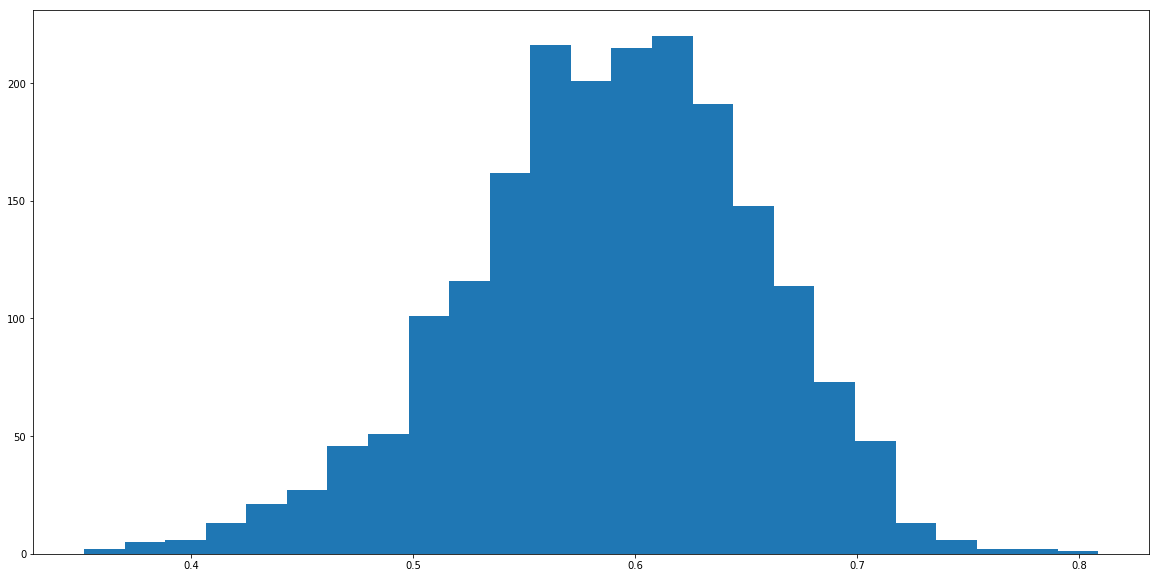

In [24]:
plt.figure(figsize=(20,10))
plt.hist(eigval_ratios, bins=25)
plt.show()